In [13]:
using Plots
gr(size=(600,400))
plot(rand(3),rand(3))
nothing

In [4]:
using Pkg
pkg"add Ipopt"

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [b6b21f68] + Ipopt v0.6.1
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [7]:
using JuMP, Ipopt

┌ Info: Precompiling Ipopt [b6b21f68-93f8-5de0-b562-5493be1d77c9]
└ @ Base loading.jl:1260


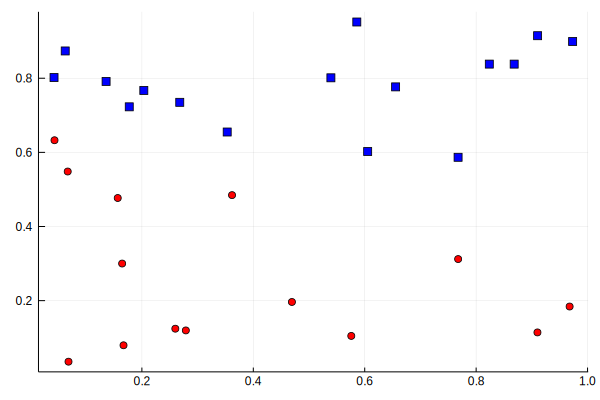

In [34]:
using Random, LinearAlgebra

Random.seed!(0)

n = 30
X = rand(n, 2)
w_sol = [0.3; 0.7]
b_sol = -0.5
y = [dot(w_sol, X[i,:]) + b_sol > 0 ? 1 : -1 for i = 1:n]

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

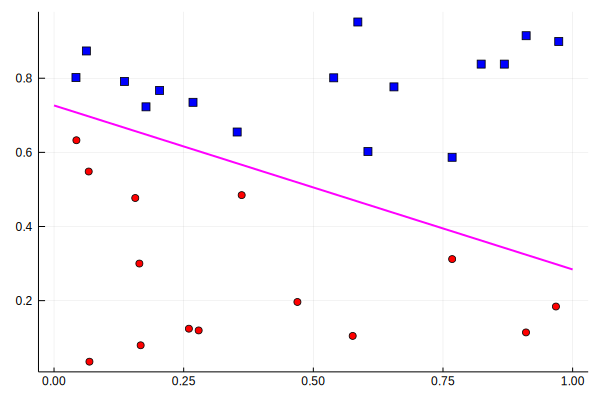

In [38]:
using JuMP, Ipopt

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0))

@variable(model, w[1:2])
@variable(model, b)

@objective(model, Min, dot(w, w) / 2)

@constraint(model, [i=1:n], (dot(w, X[i,:]) + b) * y[i] ≥ 1)

#print(model)

optimize!(model)

w, b = value.(w), value(b)

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

plot!(x -> -(w[1] * x + b) / w[2], 0, 1, c=:magenta, lw=2)

In [36]:
w, b

([5.91775410327601, 13.376069868373913], -9.718277405139158)

In [37]:
w ./ w_sol, b / b_sol

([19.725847010920035, 19.10867124053416], 19.436554810278317)

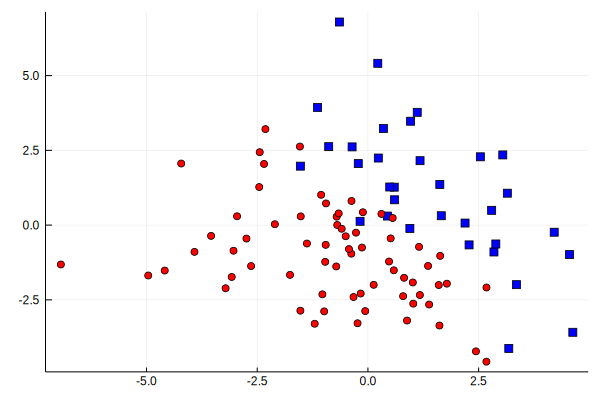

In [64]:
using Random, LinearAlgebra

Random.seed!(0)

n = 100
X = randn(n, 2) * 2
w_sol = [0.5; 0.4]
b_sol = -0.5
y = [dot(w_sol, X[i,:]) + b_sol > randn() * 0.5 ? 1 : -1 for i = 1:n]

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

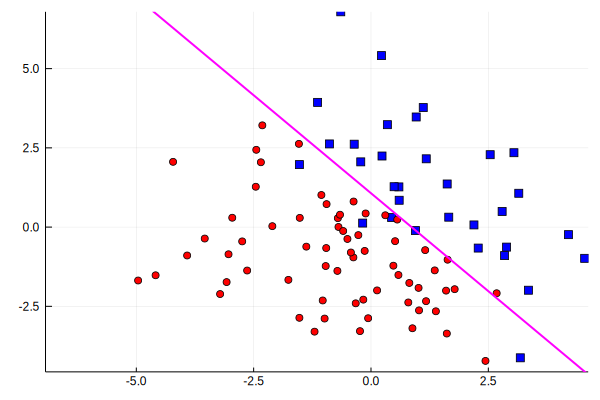

In [66]:
using JuMP, Ipopt

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0))

@variable(model, w[1:2])
@variable(model, b)

@objective(model, Min, dot(w, w) / 2)

@constraint(model, [i=1:n], (dot(w, X[i,:]) + b) * y[i] ≥ 1)

#print(model)

optimize!(model)

w, b = value.(w), value(b)

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

plot!(x -> -(w[1] * x + b) / w[2], extrema(X[:,1])..., c=:magenta, lw=2)
xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)

In [44]:
termination_status(model)

LOCALLY_INFEASIBLE::TerminationStatusCode = 5

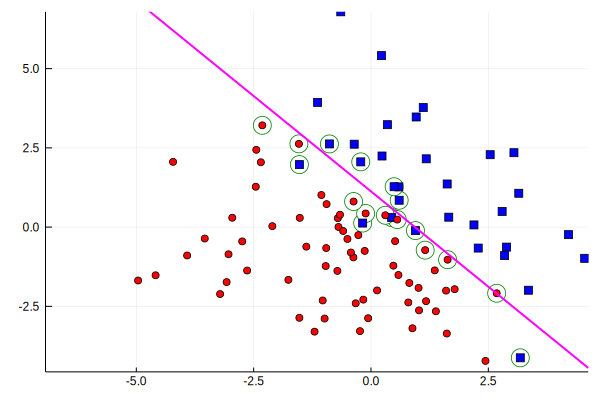

In [69]:
using JuMP, Ipopt

C = 1.0

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0))

@variable(model, w[1:2])
@variable(model, b)
@variable(model, ξ[1:n] ≥ 0)

@objective(model, Min, dot(w, w) / 2 + C * sum(ξ))

@constraint(model, [i=1:n], (dot(w, X[i,:]) + b) * y[i] ≥ 1 - ξ[i])

#print(model)

optimize!(model)

w, b, ξ = value.(w), value(b), value.(ξ)

plot(leg=false)
I = findall(ξ .> 1e-6)
scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

plot!(x -> -(w[1] * x + b) / w[2], extrema(X[:,1])..., c=:magenta, lw=2)
xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)